<a href="https://colab.research.google.com/github/YooJung-Moon/K-melon/blob/main/ResNet50_basic_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Library

In [15]:
import tensorflow as tf
from tensorflow import keras
from keras.utils import load_img, img_to_array, array_to_img
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# %cd "/content"
# # %cd "/content/drive/MyDrive"
# !mkdir img

/content


### Data Download

In [2]:
!wget https://www.dropbox.com/s/diwzbpumn81dwhd/img4.zip?dl=0

--2023-06-19 04:58:24--  https://www.dropbox.com/s/diwzbpumn81dwhd/img4.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6035:18::a27d:5512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/diwzbpumn81dwhd/img4.zip [following]
--2023-06-19 04:58:24--  https://www.dropbox.com/s/raw/diwzbpumn81dwhd/img4.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc7e477fe699e76135eae9a05608.dl.dropboxusercontent.com/cd/0/inline/B-RtUDtoqFiw_AhlsiNnR-gPmH5_PgvYGvLRWFCrGVcWG620ACKUYGchC1cn2Tr0rDbbBTahV9KFdqWfljFV9y8Qa7nGtKHfl8ggKRBfkZoXVANLtuU7ihxXyFk2QunOrvngaWKewQ-taM7NSYiUcGaQDvTtEn_khy4kbh5CT1Mhag/file# [following]
--2023-06-19 04:58:24--  https://uc7e477fe699e76135eae9a05608.dl.dropboxusercontent.com/cd/0/inline/B-RtUDtoqFiw_AhlsiNnR-gPmH5_PgvYGvLRWFCrGVcWG620ACKUYGchC1cn2Tr0rDbbBTahV9KFdqWfljFV9y

In [3]:
# !unzip '/content/drive/MyDrive/deeplearning/img3.zip' -d '/content/img'
!unzip '/content/img4.zip?dl=0'

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: img4/val/정상/S027-FM02-027-2022-06-28-000074.jpg  
  inflating: __MACOSX/img4/val/정상/._S027-FM02-027-2022-06-28-000074.jpg  
  inflating: img4/val/정상/S026-FM02-026-2022-06-28-000043.jpg  
  inflating: __MACOSX/img4/val/정상/._S026-FM02-026-2022-06-28-000043.jpg  
  inflating: img4/val/정상/S051-FM03-051-2022-07-05-000049.jpg  
  inflating: __MACOSX/img4/val/정상/._S051-FM03-051-2022-07-05-000049.jpg  
  inflating: img4/val/정상/S009-FM01-009-2022-06-27-000092.jpg  
  inflating: __MACOSX/img4/val/정상/._S009-FM01-009-2022-06-27-000092.jpg  
  inflating: img4/val/정상/S024-FM02-024-2022-06-28-000005.jpg  
  inflating: __MACOSX/img4/val/정상/._S024-FM02-024-2022-06-28-000005.jpg  
  inflating: img4/val/정상/S034-FM02-034-2022-07-09-000016.jpg  
  inflating: __MACOSX/img4/val/정상/._S034-FM02-034-2022-07-09-000016.jpg  
  inflating: img4/val/정상/S010-FM01-010-2022-06-30-000043.jpg  
  inflating: __MACOSX/img4/

### Data preprocessing

In [4]:
epochs = 20
batch_size = 32
IMG_HEIGHT = 224
IMG_WIDTH = 224

In [5]:
img_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

Directory structure
| --- img
|　　| --- test
|　　|　　| --- 노균병
|　　|　　| --- 노균병유사
|　　|　　| --- 정상
|　　|　　| --- 흰가루병
|　　|　　| --- 흰가루병유사
|　　| --- train
|　　|　　| --- 노균병
|　　|　　| --- 노균병유사
|　　|　　| --- 정상
|　　|　　| --- 흰가루병
|　　|　　| --- 흰가루병유사
|　　| --- val
|　　|　　| --- 노균병
|　　|　　| --- 노균병유사
|　　|　　| --- 정상
|　　|　　| --- 흰가루병
|　　|　　| --- 흰가루병유사

In [6]:
train_set = img_gen.flow_from_directory(directory="/content/img4/train",
                                        target_size = (IMG_WIDTH,IMG_HEIGHT),
                                        class_mode='categorical',
                                        batch_size = batch_size)
val_set = img_gen.flow_from_directory(directory="/content/img4/val",
                                        target_size = (IMG_WIDTH,IMG_HEIGHT),
                                        class_mode='categorical',
                                        batch_size = batch_size)
test_set = img_gen.flow_from_directory(directory="/content/img4/test",
                                        target_size = (IMG_WIDTH,IMG_HEIGHT),
                                        class_mode='categorical',
                                        batch_size = batch_size)

Found 32855 images belonging to 5 classes.
Found 8268 images belonging to 5 classes.
Found 1670 images belonging to 5 classes.


In [7]:
train_set.class_indices

{'노균병': 0,
 '노균병유사': 1,
 '정상': 2,
 '흰가루병': 3,
 '흰가루병유사': 4}

### Build Model

In [8]:
model = tf.keras.applications.resnet50.ResNet50(
    include_top=True,
    weights=None,
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=5
)

In [9]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

### Train Model

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_set, epochs=epochs, batch_size = batch_size,validation_data=val_set)

Epoch 1/20
1034/1034 [==============================] - 424s 357ms/step - loss: 0.1138 - accuracy: 0.5943 - val_loss: 0.1170 - val_accuracy: 0.5461
Epoch 2/20
1034/1034 [==============================] - 382s 369ms/step - loss: 0.0733 - accuracy: 0.7413 - val_loss: 0.1123 - val_accuracy: 0.5879
Epoch 3/20
1034/1034 [==============================] - 367s 355ms/step - loss: 0.0552 - accuracy: 0.8089 - val_loss: 0.0949 - val_accuracy: 0.6567
Epoch 4/20
1034/1034 [==============================] - 368s 356ms/step - loss: 0.0483 - accuracy: 0.8351 - val_loss: 0.0800 - val_accuracy: 0.7385
Epoch 5/20
1034/1034 [==============================] - 368s 356ms/step - loss: 0.0474 - accuracy: 0.8386 - val_loss: 0.0494 - val_accuracy: 0.8229
Epoch 6/20
1034/1034 [==============================] - 373s 361ms/step - loss: 0.0440 - accuracy: 0.8525 - val_loss: 0.1195 - val_accuracy: 0.6047
Epoch 7/20
1034/1034 [==============================] - 369s 356ms/step - loss: 0.0392 - accuracy: 0.8694 - val_

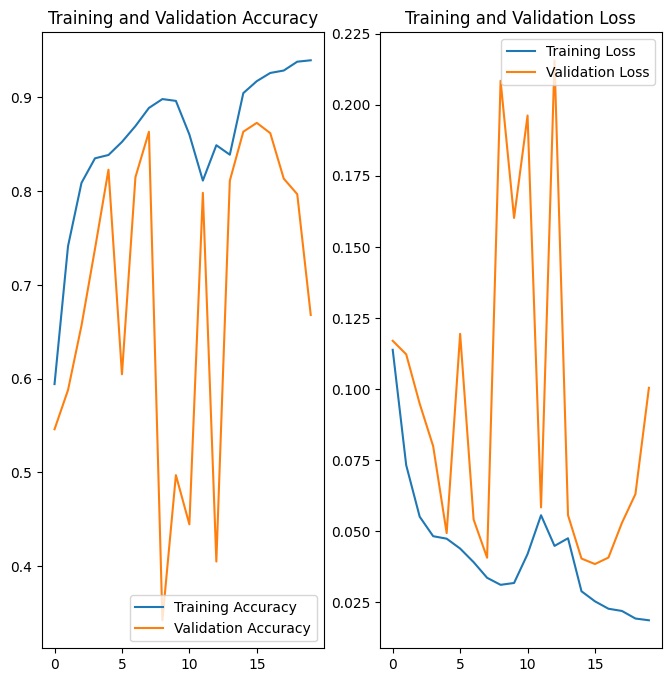

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)

plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')

plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')

plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# %cd "/content/drive/MyDrive/deeplearning"
# model.save("기본전체_ResNet50.h5")

/content/drive/MyDrive/deeplearning


In [12]:
# from keras.models import load_model
# model = load_model('/content/drive/MyDrive/deeplearning/기본전체_ResNet50.h5')

### Evaluate Model and Confusion matrix

In [13]:
model.evaluate(test_set)

53/53 [==============================] - 16s 117ms/step - loss: 0.1419 - accuracy: 0.5263


[0.14192262291908264, 0.526347279548645]

In [32]:
images = []
labels = []

def load_image():
  global images, labels
  dir = "/content/img4/test/"
  class_dir = ['노균병','노균병유사','정상','흰가루병','흰가루병유사']
  for index in range(len(class_dir)):
    list_dir = dir+class_dir[index]+"/"
    for j in os.listdir(list_dir):
      if j == ".ipynb_checkpoints":
        continue
      img = load_img(list_dir+j)
      test_array = img_to_array(img)
      test_x = tf.expand_dims(img,0)
      images.append(test_x)
      labels.append(index)
load_image()
labels = np.array(labels)

In [33]:
y = []
for i in range(len(images)):
  predictions = model.predict(images[i]/255)
  pred = np.argmax(predictions)
  y.append(pred)
class_names = list(test_set.class_indices.keys())
confusion_matrix = confusion_matrix(y, labels)
print(confusion_matrix)
print('Classification Report:')
print(classification_report(y, labels, target_names=class_names))

1/1 [==============================] - 0s 37ms/step
[[270   0   0   1   1]
 [ 14 105   0   1   2]
 [ 18 153 393   3  33]
 [ 23  11   0  76   3]
 [ 74 130   6 318  35]]
Classification Report:
                precision    recall  f1-score   support

      노균병       0.68      0.99      0.80       272
  노균병유사       0.26      0.86      0.40       122
        정상       0.98      0.66      0.79       600
    흰가루병       0.19      0.67      0.30       113
흰가루병유사       0.47      0.06      0.11       563

      accuracy                           0.53      1670
     macro avg       0.52      0.65      0.48      1670
  weighted avg       0.66      0.53      0.50      1670

